In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
import matplotlib as mpl


In [2]:
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']


sector_dict = {
    'XLC': 'Communication Services',
    'XLY': 'Consumer Discretionary',
    'XLP': 'Consumer Staples',
    'XLE': 'Energy',
    'XLF': 'Financials',
    'XLI': 'Industrials',
    'XLB': 'Materials',
    'XLV': 'Health Care',
    'XLRE': 'Real Estate',
    'XLK': 'Technology',
    'XLU': 'Utilities'
}

data = {}
start_date = '2023-06-01'
end_date = '2023-06-30'

In [3]:
for sector, name in sector_dict.items():
    ticker = yf.Ticker(sector)
    hist = ticker.history(start=start_date, end=end_date)
    monthly_return = (hist['Close'].iloc[-1] - hist['Open'].iloc[0]) / hist['Open'].iloc[0]
    data[name] = monthly_return

In [4]:
df = pd.DataFrame.from_dict(data, orient='index', columns=['Return'])
df.index.name = 'Sector'
df = df.reset_index()
df.sort_values(by='Return', inplace=True)

max_abs_return = max(abs(df['Return'].min()), df['Return'].max())
cmap = get_cmap('RdYlGn') 
norm = Normalize(vmin=-max_abs_return, vmax=max_abs_return)
bar_colors = cmap(norm(df['Return'].values))


C:\Users\User\AppData\Local\Temp\ipykernel_6868\596908468.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('RdYlGn')


C:\Users\User\AppData\Local\Temp\ipykernel_6868\4287944348.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.2%}'.format(x) for x in ax.get_xticks()])


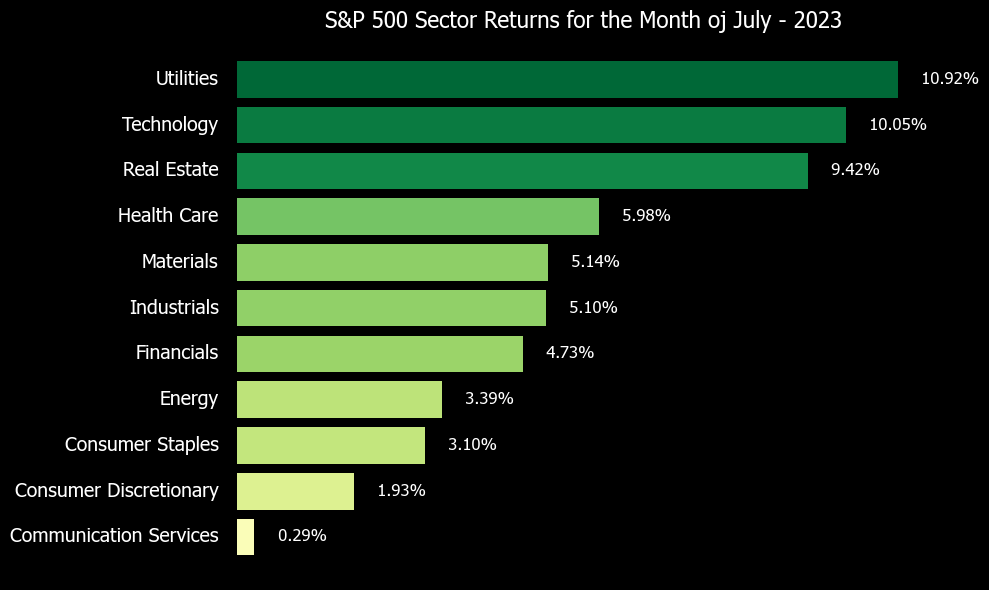

In [5]:
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(df['Sector'], df['Return'], color=bar_colors)
    ax.set_xticklabels(['{:,.2%}'.format(x) for x in ax.get_xticks()])

    for i, v in enumerate(df['Return']):
        ax.text(v if v < 0 else v + 0.003, i, ' {:,.2%}'.format(abs(v)), color='white', va='center', fontsize=12)
        ax.text(-0.003, i, df['Sector'][i], color='white', va='center', ha='right', fontsize=14)

    ax.axis('off')
    plt.title('S&P 500 Sector Returns for the Month oj July - 2023', color='white', fontsize=16)
    plt.tight_layout()
    plt.show()


In [6]:
# Convert the DataFrame to a dictionary
sector_return_dict = df.set_index('Sector')['Return'].to_dict()

print(sector_return_dict)


{'Utilities': 0.00292952540297221, 'Consumer Staples': 0.019293083628201858, 'Health Care': 0.031034243775760816, 'Communication Services': 0.0338775479116286, 'Technology': 0.04725501304700882, 'Financials': 0.05103170175696498, 'Real Estate': 0.05139206193008821, 'Energy': 0.059793808379815315, 'Materials': 0.09419986304043812, 'Industrials': 0.10048949877128616, 'Consumer Discretionary': 0.10917136255025413}
